In [3]:
pip install numpy matplotlib scikit-learn


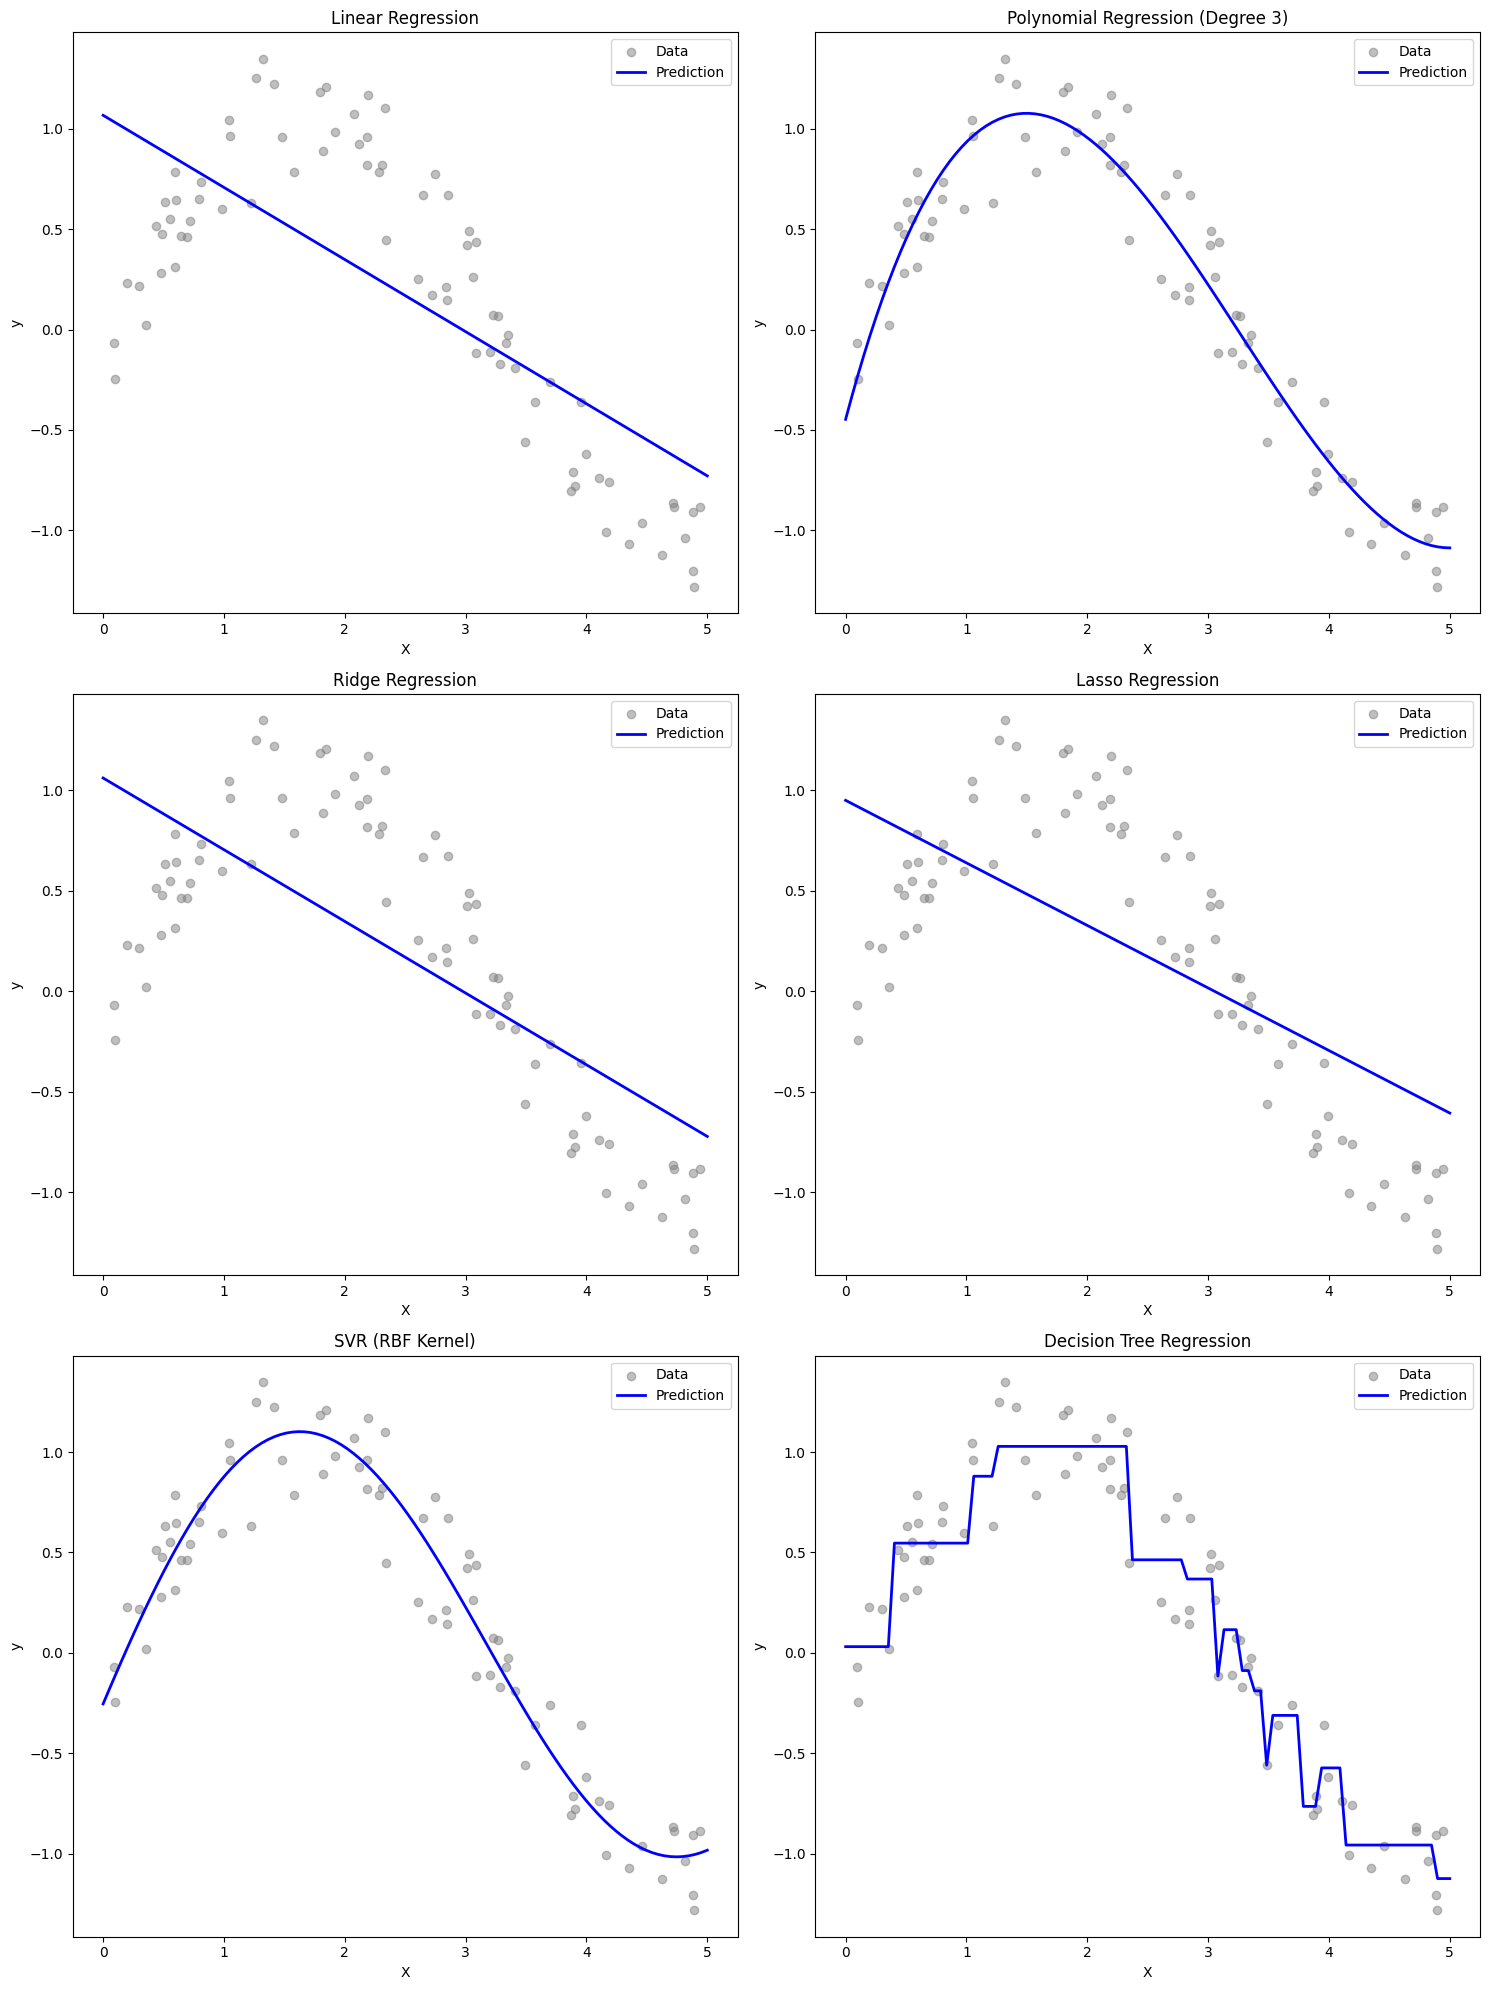

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

# Generate synthetic data
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.2, X.shape[0])  # sin curve with noise

# Create test data for smooth curves
X_test = np.linspace(0, 5, 100).reshape(-1, 1)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Polynomial Regression (Degree 3)": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "SVR (RBF Kernel)": SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1),
    "Decision Tree Regression": DecisionTreeRegressor(max_depth=4)
}

# Transform input for polynomial regression
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
X_test_poly = poly.transform(X_test)
models["Polynomial Regression (Degree 3)"].fit(X_poly, y)

# Predict and store results
predictions = {}
for name, model in models.items():
    if "Polynomial" in name:
        y_pred = model.predict(X_test_poly)
    else:
        model.fit(X, y)
        y_pred = model.predict(X_test)
    predictions[name] = y_pred

# Plot all models
plt.figure(figsize=(15, 20))
for i, (name, y_pred) in enumerate(predictions.items(), 1):
    plt.subplot(3, 2, i)
    plt.scatter(X, y, color='gray', label='Data', alpha=0.5)
    plt.plot(X_test, y_pred, color='blue', linewidth=2, label='Prediction')
    plt.title(name)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()

plt.tight_layout()
plt.show()
